# Análise de gastos da UFCG em relação ao seu gasto

## Importando bibliotecas e preparando dados

In [82]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
orcamento_completo = pd.read_csv('../consulta_siop_orcamento_ufcg.csv')
orcamento_objetivo = orcamento_completo.iloc[:, 18:]
orcamento_objetivo['ano'] = orcamento_completo['ano']

## Tratando os dados

Nosso objetivo é refinar os dados que nós já temos, para termos informações mais fáceis a serem analisadas. Com este intuito, será utilizado uma série de computações para a criação de uma tabela dinâmica em que teremos informações específicas de cada ano para cada objetivo.

### Cuidados básicos

Tratando o DataFrame para padronizar e possibilitar a análise.

In [84]:
objetivo_copia: pd.DataFrame = orcamento_objetivo.copy(deep=True)

for coluna in objetivo_copia.columns[1:-1]:
    objetivo_copia[coluna] = objetivo_copia[coluna].map(lambda value: value.replace(".",""))
    objetivo_copia[coluna] = objetivo_copia[coluna].astype('int64')

objetivo_copia


,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
0,[valor não detalhado],0,7686431,14586431,0,0,0,2012
1,[valor não detalhado],0,22956997,22956997,0,0,0,2012
2,[valor não detalhado],0,38666570,38666570,0,0,0,2012
3,[valor não detalhado],21584508,0,0,0,0,0,2012
4,[valor não detalhado],38666570,0,0,0,0,0,2012
...,...,...,...,...,...,...,...,...
4958,[valor não detalhado],0,13000,13000,0,0,0,2023
4959,[valor não detalhado],13000,0,0,0,0,0,2023
4960,[valor não detalhado],0,68000,68000,0,0,0,2023
4961,[valor não detalhado],68000,0,0,0,0,0,2023


### Agrupar informações

Temos muitas informações separadas, ou seja, temos mais de quatro mil linhas mas não temos visão do todo. Essa sessão será para criar uma tabela que sintetize a tabela completa em uma partição muito menor, que possibilite a identificação de comportamentos em escala de anos.

In [85]:
monetario = [
    'projeto_de_lei', 
    'dotacao_inicial', 
    'dotacao_atual', 
    'empenhado', 
    'liquidado', 
    'pago'
]

alvo = [
    'objetivo',
    'ano'
]

In [113]:
objetivo_informacoes = objetivo_copia.groupby(alvo)[monetario].agg([
    sum, len, max, lambda col_monetaria: col_monetaria.mean()
])

objetivo_informacoes.rename(columns={'<lambda_0>':'media', 
                                     'sum': 'soma', 
                                     'len': 'quantidade de gastos', 
                                     'max': 'maximo'}, inplace=True)

objetivo_informacoes['quantidade_de_gastos'] = objetivo_informacoes[('projeto_de_lei', 'quantidade de gastos')]

objetivo_informacoes.drop(inplace=True, columns=[
    ('projeto_de_lei', 'quantidade de gastos'),
    ('dotacao_inicial', 'quantidade de gastos'),
    ('dotacao_atual', 'quantidade de gastos'),
    ('empenhado', 'quantidade de gastos'),
    ('liquidado', 'quantidade de gastos'),
    ('pago', 'quantidade de gastos')
])

objetivo_informacoes

projeto_de_lei  \
                                                                  soma   
objetivo                                           ano                   
0582 - Expandir, interiorizar, democratizar e q... 2014        1598204   
                                                   2015        1511577   
0597 - Promover, em articulação com os sistemas... 2012         229892   
                                                   2013        1360240   
                                                   2014        1704881   
                                                   2015         642701   
0803 - Apoiar a formação de pessoal qualificado... 2012         461369   
                                                   2013        2324165   
                                                   2014        2011276   
                                                   2015        1252583   
0841 - Ampliar o acesso à educação superior com... 2012       74484103   
                                                   2013       84182086   
                                                   2014       93645202   
                                                   2015      107301602   
1009 - Ampliar o acesso à educação profissional... 2016        1903044   
                                                   2017        1541230   
                                                   2018        1229204   
                                                   2019        1659645   
1010 - Ampliar o acesso à educação superior de ... 2016      110671031   
                                                   2017      102848784   
                                                   2018       87532645   
                                                   2019       89416257   
1204 - Ampliar o acesso à educação profissional... 2020         982507   
                                                   2021         959417   
                                                   2022        1704567   
                                                   2023        1661362   
1237 - Fomentar a formação de pessoal qualifica... 2020       55953608   
                                                   2021       32587658   
                                                   2022       77579609   
                                                   2023       72887646   
[valor não detalhado]                              2012      304127438   
                                                   2013      315468518   
                                                   2014      381347718   
                                                   2015      422531400   
                                                   2016      478443148   
                                                   2017      542525837   
                                                   2018      564164581   
                                                   2019      591671792   
                                                   2020      578404832   
                                                   2021      366415747   
                                                   2022      664228115   
                                                   2023      679352320   

                                                                    \
                                                            maximo   
objetivo                                           ano               
0582 - Expandir, interiorizar, democratizar e q... 2014     576417   
                                                   2015     561060   
0597 - Promover, em articulação com os sistemas... 2012     227392   
                                                   2013    1360240   
                                                   2014    1704881   
                                                   2015     642701   
0803 - Apoiar a formação de pessoal qualificado... 2012     181440   
                         

### Filtração dos dados em Ensino Superior e Formação profissional

O objetivo desta etapa é produzir uma nova tabela dinâmica que contenha os gastos em objetivos traduzidos para "Ensino Superior" e "Formação Profissional". A partir desta nova tabela, será filtrado os dados em tabelas menores em que teremos informações específicas de gastos do ensino superior e de formação profissional.

In [87]:
objetivo_geral = objetivo_copia.copy(deep=True)
objetivo_geral.drop(objetivo_geral[objetivo_geral.objetivo == '[valor não detalhado]'].index, inplace=True)
objetivo_geral

,objetivo,projeto_de_lei,dotacao_inicial,dotacao_atual,empenhado,liquidado,pago,ano
32,"0597 - Promover, em articulação com os sistema...",0,227392,227392,0,0,0,2012
33,"0597 - Promover, em articulação com os sistema...",227392,0,0,0,0,0,2012
34,"0597 - Promover, em articulação com os sistema...",0,2500,2500,0,0,0,2012
35,"0597 - Promover, em articulação com os sistema...",2500,0,0,0,0,0,2012
36,0803 - Apoiar a formação de pessoal qualificad...,0,375208,375208,0,0,0,2012
...,...,...,...,...,...,...,...,...
4953,1237 - Fomentar a formação de pessoal qualific...,0,0,0,2071551,2068767,2068767,2023
4954,1237 - Fomentar a formação de pessoal qualific...,0,1500000,0,0,0,0,2023
4955,1237 - Fomentar a formação de pessoal qualific...,0,0,4087661,0,0,0,2023
4956,1237 - Fomentar a formação de pessoal qualific...,0,3400000,3400000,0,0,0,2023


In [88]:
objetivo_geral.objetivo.replace('0582 - Expandir, interiorizar, democratizar e qualificar a oferta...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.replace('0597 - Promover, em articulação com os sistemas de ensino estaduais...', 'ensino_basico', inplace=True)
objetivo_geral.objetivo.replace('0803 - Apoiar a formação de pessoal qualificado em nível superior...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('0841 - Ampliar o acesso à educação superior com condições de...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('1009 - Ampliar o acesso à educação profissional e tecnológica de...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.replace('1010 - Ampliar o acesso à educação superior de qualidade, na...', 'ensino_superior', inplace=True)
objetivo_geral.objetivo.replace('1204 - Ampliar o acesso à educação profissional e tecnológica, em...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.replace('1237 - Fomentar a formação de pessoal qualificado, fortalecendo a...', 'formacao_profissional', inplace=True)
objetivo_geral.objetivo.unique()

array(['ensino_basico', 'ensino_superior', 'formacao_profissional'],
      dtype=object)

In [89]:
colunas_alvo_soma = [
    ('projeto_de_lei','soma'),
    ('dotacao_inicial','soma'),
    ('dotacao_atual','soma'),
    ('empenhado','soma'),
    ('liquidado','soma'),
    ('pago','soma')
]

colunas_alvo_quantidade = 'quantidade_de_gastos'

colunas_alvo_maximo = [
    ('projeto_de_lei','maximo'),
    ('dotacao_inicial','maximo'),
    ('dotacao_atual','maximo'),
    ('empenhado','maximo'),
    ('liquidado','maximo'),
    ('pago','maximo')
]

colunas_alvo_minimo = [
    ('projeto_de_lei','minimo'),
    ('dotacao_inicial','minimo'),
    ('dotacao_atual','minimo'),
    ('empenhado','minimo'),
    ('liquidado','minimo'),
    ('pago','minimo')
]

colunas_alvo_media = [
    ('projeto_de_lei','media'),
    ('dotacao_inicial','media'),
    ('dotacao_atual','media'),
    ('empenhado','media'),
    ('liquidado','media'),
    ('pago','media')
]

In [90]:
objetivo_geral_comparacoes = objetivo_geral.groupby(alvo)[monetario].agg([
    sum, len, max,  lambda col_monetaria: col_monetaria.mean()
])

objetivo_geral_comparacoes.rename(columns={'<lambda_0>':'media', 
                                     'sum': 'soma', 
                                     'len': 'quantidade de gastos', 
                                     'max': 'maximo'}, inplace=True)

objetivo_geral_comparacoes['quantidade_de_gastos'] = objetivo_geral_comparacoes[('projeto_de_lei', 'quantidade de gastos')]

objetivo_geral_comparacoes.drop(inplace=True, columns=[
    ('projeto_de_lei', 'quantidade de gastos'),
    ('dotacao_inicial', 'quantidade de gastos'),
    ('dotacao_atual', 'quantidade de gastos'),
    ('empenhado', 'quantidade de gastos'),
    ('liquidado', 'quantidade de gastos'),
    ('pago', 'quantidade de gastos')
])

In [91]:
objetivo_geral_comparacoes

projeto_de_lei                           \
                                     soma    maximo          media   
objetivo              ano                                            
ensino_basico         2012         229892    227392   57473.000000   
                      2013        1360240   1360240   85015.000000   
                      2014        1704881   1704881  213110.125000   
                      2015         642701    642701   91814.428571   
ensino_superior       2012       74945472  16264609  248163.814570   
                      2013       86506251  14303080  209966.628641   
                      2014       95656478  19500000  322075.683502   
                      2015      108554185  25000000  337124.798137   
                      2016      110671031  22401000  427301.277992   
                      2017      102848784  18992524  461205.309417   
                      2018       87532645  30000000  412889.834906   
                      2019       89416257  28000000  382120.756410   
formacao_profissional 2014        1598204    576417   39955.100000   
                      2015        1511577    561060   36867.731707   
                      2016        1903044    385000   37314.588235   
                      2017        1541230    355000   29079.811321   
                      2018        1229204    398000   30730.100000   
                      2019        1659645    398000   36079.239130   
                      2020       56936115  16576000  237233.812500   
                      2021       33547075   6464492  153885.665138   
                      2022       79284176  20340000  309703.812500   
                      2023       74549008  18010819  477878.256410   

                           dotacao_inicial                           \
                                      soma    maximo          media   
objetivo              ano                                             
ensino_basico         2012          229892    227392   57473.000000   
                      2013         1360240   1360240   85015.000000   
                      2014         1104881   1104881  138110.125000   
                      2015          642701    642701   91814.428571   
ensino_superior       2012        79645472  31117535  263726.728477   
                      2013        88906251  34211912  215791.871359   
                      2014        98356478  41014888  331166.592593   
                      2015       110354185  48458138  342714.860248   
                      2016       127831193  51934094  493556.729730   
                      2017       108998784  49988767  488783.784753   
                      2018        90528501  56748411  427021.231132   
                      2019       117666663  56744247  502848.987179   
formacao_profissional 2014         1598204    741649   39955.100000   
                      2015         1511577    685564   36867.731707   
                      2016         1903044    843788   37314.588235   
                      2017         1541230    795145   29079.811321   
                      2018         1229204    905204   30730.100000   
                      2019         1659645   1295595   36079.239130   
                      2020        56810415  32487620  236710.062500   
                      2021        31501687  16757456  144503.151376   
                      2022        88258403  49268772  344759.386719   
                      2023        77054177  42782598  493937.032051   

                           dotacao_atual                           empenhado  \
                                    soma    maximo          media       soma   
objetivo              ano                                                      
ensino_basico         2012        229892    227392   57473.000000          0   
                      2013       1590132   1360240   99383.250000     174205   
                      2014       1104881   1104881  138110.125000     204310   
                    

In [92]:
objetivo_ensino_superior = objetivo_geral_comparacoes.iloc[4:12]
objetivo_ensino_superior

projeto_de_lei                          dotacao_inicial  \
                               soma    maximo          media            soma   
objetivo        ano                                                            
ensino_superior 2012       74945472  16264609  248163.814570        79645472   
                2013       86506251  14303080  209966.628641        88906251   
                2014       95656478  19500000  322075.683502        98356478   
                2015      108554185  25000000  337124.798137       110354185   
                2016      110671031  22401000  427301.277992       127831193   
                2017      102848784  18992524  461205.309417       108998784   
                2018       87532645  30000000  412889.834906        90528501   
                2019       89416257  28000000  382120.756410       117666663   

                                              dotacao_atual            \
                        maximo          media          soma    maximo   
objetivo        ano                                                     
ensino_superior 2012  31117535  263726.728477      92487495  31571717   
                2013  34211912  215791.871359      95644082  35359655   
                2014  41014888  331166.592593     104406478  40714834   
                2015  48458138  342714.860248     110354185  47884372   
                2016  51934094  493556.729730     126827669  52028889   
                2017  49988767  488783.784753     107394669  49800079   
                2018  56748411  427021.231132      90528501  56518520   
                2019  56744247  502848.987179     115616251  52255514   

                                     empenhado                           \
                              media       soma    maximo          media   
objetivo        ano                                                       
ensino_superior 2012  306249.983444   72327023   9554702  239493.453642   
                2013  232145.830097   83887555  15797705  203610.570388   
                2014  351536.962963   78123675  15061085  263042.676768   
                2015  342714.860248   89816781  20403156  278934.102484   
                2016  489682.119691   99433387  20727552  383912.691120   
                2017  481590.443946   84232920  20463765  377726.098655   
                2018  427021.231132   90417168  24137988  426496.075472   
                2019  494086.542735  115370433  25000000  493036.038462   

                     liquidado                               pago            \
                          soma    maximo          media      soma    maximo   
objetivo        ano                                                           
ensino_superior 2012  49843157   8215761  165043.566225  48309918   8011360   
                2013  63277767  14309592  153586.813107  60742789  14240406   
                2014  63814148  14972325  214862.451178  62798863  14844818   
                2015  70191290  18872392  217985.372671  63953942  18162988   
                2016  69885656  17705662  269828.787645  69016877  17705662   
                2017  60327327  16362275  270526.130045  59389224  15643632   
                2018  54572959  15389881  257419.617925  54012312  14963179   
                2019  50076838  10991901  214003.581197  49672665  10991901   

                                    quantidade_de_gastos  
                              media                       
objetivo        ano                                       
ensino_superior 2012  159966.615894                  302  
                2013  147433.953883                  412  
                2014  211443.983165                  297  
                2015  198614.726708                  322  
                2016  266474.428571                  259  
                2017  266319.390135                  223  
                2018  254775.056604                  212  
                2019  212276.346154               

In [93]:
objetivo_ensino_superior = objetivo_ensino_superior.reset_index().iloc[:,1:]
objetivo_ensino_superior.index = objetivo_ensino_superior.iloc[:,0]
objetivo_ensino_superior = objetivo_ensino_superior.iloc[:,1:]
objetivo_ensino_superior.index.rename('ano', inplace=True)
objetivo_ensino_superior

projeto_de_lei                          dotacao_inicial            \
               soma    maximo          media            soma    maximo   
ano                                                                      
2012       74945472  16264609  248163.814570        79645472  31117535   
2013       86506251  14303080  209966.628641        88906251  34211912   
2014       95656478  19500000  322075.683502        98356478  41014888   
2015      108554185  25000000  337124.798137       110354185  48458138   
2016      110671031  22401000  427301.277992       127831193  51934094   
2017      102848784  18992524  461205.309417       108998784  49988767   
2018       87532645  30000000  412889.834906        90528501  56748411   
2019       89416257  28000000  382120.756410       117666663  56744247   

                    dotacao_atual                           empenhado  \
              media          soma    maximo          media       soma   
ano                                                                     
2012  263726.728477      92487495  31571717  306249.983444   72327023   
2013  215791.871359      95644082  35359655  232145.830097   83887555   
2014  331166.592593     104406478  40714834  351536.962963   78123675   
2015  342714.860248     110354185  47884372  342714.860248   89816781   
2016  493556.729730     126827669  52028889  489682.119691   99433387   
2017  488783.784753     107394669  49800079  481590.443946   84232920   
2018  427021.231132      90528501  56518520  427021.231132   90417168   
2019  502848.987179     115616251  52255514  494086.542735  115370433   

                              liquidado                               pago  \
        maximo          media      soma    maximo          media      soma   
ano                                                                          
2012   9554702  239493.453642  49843157   8215761  165043.566225  48309918   
2013  15797705  203610.570388  63277767  14309592  153586.813107  60742789   
2014  15061085  263042.676768  63814148  14972325  214862.451178  62798863   
2015  20403156  278934.102484  70191290  18872392  217985.372671  63953942   
2016  20727552  383912.691120  69885656  17705662  269828.787645  69016877   
2017  20463765  377726.098655  60327327  16362275  270526.130045  59389224   
2018  24137988  426496.075472  54572959  15389881  257419.617925  54012312   
2019  25000000  493036.038462  50076838  10991901  214003.581197  49672665   

                              quantidade_de_gastos  
        maximo          media                       
ano                                                 
2012   8011360  159966.615894                  302  
2013  14240406  147433.953883                  412  
2014  14844818  211443.983165                  297  
2015  18162988  198614.726708                  322  
2016  17705662  266474.428571                  259  
2017  15643632  266319.390135                  223  
2018  14963179  254775.056604                  212  
2019  10991901  212276.346154                  234

In [94]:
objetivo_formacao_profissional = objetivo_geral_comparacoes.iloc[12:]
objetivo_formacao_profissional

projeto_de_lei                           \
                                     soma    maximo          media   
objetivo              ano                                            
formacao_profissional 2014        1598204    576417   39955.100000   
                      2015        1511577    561060   36867.731707   
                      2016        1903044    385000   37314.588235   
                      2017        1541230    355000   29079.811321   
                      2018        1229204    398000   30730.100000   
                      2019        1659645    398000   36079.239130   
                      2020       56936115  16576000  237233.812500   
                      2021       33547075   6464492  153885.665138   
                      2022       79284176  20340000  309703.812500   
                      2023       74549008  18010819  477878.256410   

                           dotacao_inicial                           \
                                      soma    maximo          media   
objetivo              ano                                             
formacao_profissional 2014         1598204    741649   39955.100000   
                      2015         1511577    685564   36867.731707   
                      2016         1903044    843788   37314.588235   
                      2017         1541230    795145   29079.811321   
                      2018         1229204    905204   30730.100000   
                      2019         1659645   1295595   36079.239130   
                      2020        56810415  32487620  236710.062500   
                      2021        31501687  16757456  144503.151376   
                      2022        88258403  49268772  344759.386719   
                      2023        77054177  42782598  493937.032051   

                           dotacao_atual                          empenhado  \
                                    soma    maximo          media      soma   
objetivo              ano                                                     
formacao_profissional 2014       1598204    741649   39955.100000    900320   
                      2015       1511577    685564   36867.731707    931800   
                      2016       1903044    842724   37314.588235   1382442   
                      2017       1541230    766988   29079.811321    862198   
                      2018       1229204    504037   30730.100000   1228740   
                      2019       1659645    698989   36079.239130   1591366   
                      2020      91042770  30766183  379344.875000  88866347   
                      2021      71034291  40600549  325845.371560  70868019   
                      2022      86528207  43005949  338000.808594  86205666   
                      2023      99893444  42752578  640342.589744  25129284   

                                                    liquidado            \
                              maximo          media      soma    maximo   
objetivo              ano                                                 
formacao_profissional 2014    312288   22508.000000    658059    312288   
                      2015    546000   22726.829268    522833    221769   
                      2016    282499   27106.705882    778554    217712   
                      2017    170445   16267.886792    517989     99897   
                      2018    266170   30718.500000   1009925    266170   
                      2019    437471   34594.913043    260009     33418   
                      2020   9790323  370276.445833  43463846   7436508   
                      2021  17538479  325082.655963  45160187  12554591   
                      2022  17397499  336740.882812  61502441  17384365   
                      2023   6301700  161085.153846  22696458   6205710   

                                               pago                           \
                                    media      soma    maximo          media   
objetivo              ano   

In [95]:
objetivo_formacao_profissional = objetivo_formacao_profissional.reset_index().iloc[:,1:]
objetivo_formacao_profissional.index = objetivo_formacao_profissional.iloc[:,0]
objetivo_formacao_profissional = objetivo_formacao_profissional.iloc[:,1:]
objetivo_formacao_profissional.index.rename('ano', inplace=True)
objetivo_formacao_profissional

projeto_de_lei                          dotacao_inicial            \
               soma    maximo          media            soma    maximo   
ano                                                                      
2014        1598204    576417   39955.100000         1598204    741649   
2015        1511577    561060   36867.731707         1511577    685564   
2016        1903044    385000   37314.588235         1903044    843788   
2017        1541230    355000   29079.811321         1541230    795145   
2018        1229204    398000   30730.100000         1229204    905204   
2019        1659645    398000   36079.239130         1659645   1295595   
2020       56936115  16576000  237233.812500        56810415  32487620   
2021       33547075   6464492  153885.665138        31501687  16757456   
2022       79284176  20340000  309703.812500        88258403  49268772   
2023       74549008  18010819  477878.256410        77054177  42782598   

                    dotacao_atual                          empenhado  \
              media          soma    maximo          media      soma   
ano                                                                    
2014   39955.100000       1598204    741649   39955.100000    900320   
2015   36867.731707       1511577    685564   36867.731707    931800   
2016   37314.588235       1903044    842724   37314.588235   1382442   
2017   29079.811321       1541230    766988   29079.811321    862198   
2018   30730.100000       1229204    504037   30730.100000   1228740   
2019   36079.239130       1659645    698989   36079.239130   1591366   
2020  236710.062500      91042770  30766183  379344.875000  88866347   
2021  144503.151376      71034291  40600549  325845.371560  70868019   
2022  344759.386719      86528207  43005949  338000.808594  86205666   
2023  493937.032051      99893444  42752578  640342.589744  25129284   

                              liquidado                               pago  \
        maximo          media      soma    maximo          media      soma   
ano                                                                          
2014    312288   22508.000000    658059    312288   16451.475000    647376   
2015    546000   22726.829268    522833    221769   12752.024390    453465   
2016    282499   27106.705882    778554    217712   15265.764706    695738   
2017    170445   16267.886792    517989     99897    9773.377358    498120   
2018    266170   30718.500000   1009925    266170   25248.125000    736924   
2019    437471   34594.913043    260009     33418    5652.369565    260009   
2020   9790323  370276.445833  43463846   7436508  181099.358333  42867510   
2021  17538479  325082.655963  45160187  12554591  207156.821101  44809719   
2022  17397499  336740.882812  61502441  17384365  240243.910156  60643114   
2023   6301700  161085.153846  22696458   6205710  145490.115385  18913248   

                              quantidade_de_gastos  
        maximo          media                       
ano                                                 
2014    312288   16184.400000                   40  
2015    221769   11060.121951                   41  
2016    217712   13641.921569                   51  
2017     99143    9398.490566                   53  
2018    266170   18423.100000                   40  
2019     33418    5652.369565                   46  
2020   7170006  178614.625000                  240  
2021  12537905  205549.169725                  218  
2022  17250675  236887.164062                  256  
2023   5405962  121238.769231                  156

### Criação de tabelas específicas

Essa sessão será justamente para a criação de tabelas mais específicas, com o fim de gerar gráficos de linhas para a identificação de possíveis comportamentos ou a falta deles. Note que cada tabela representa um objetivo, por isso o nome da variável está separada e pareada com ele.

In [96]:
objetivo_0582 = objetivo_informacoes.reset_index().iloc[:2,1:]
objetivo_0582.index = objetivo_0582.iloc[:,0]
objetivo_0582.drop(columns=['ano'], inplace=True)
objetivo_0597 = objetivo_informacoes.reset_index().iloc[2:6,1:]
objetivo_0597.index = objetivo_0597.iloc[:,0]
objetivo_0597.drop(columns=['ano'], inplace=True)
objetivo_0803  = objetivo_informacoes.reset_index().iloc[6:10,1:]
objetivo_0803.index = objetivo_0803.iloc[:,0]
objetivo_0803.drop(columns=['ano'], inplace=True)
objetivo_0841 = objetivo_informacoes.reset_index().iloc[10:14,1:]
objetivo_0841.index = objetivo_0841.iloc[:,0]
objetivo_0841.drop(columns=['ano'], inplace=True)
objetivo_1009  = objetivo_informacoes.reset_index().iloc[14:18,1:]
objetivo_1009.index = objetivo_1009.iloc[:,0]
objetivo_1009.drop(columns=['ano'], inplace=True)
objetivo_1010  = objetivo_informacoes.reset_index().iloc[18:22,1:]
objetivo_1010.index = objetivo_1010.iloc[:,0]
objetivo_1010.drop(columns=['ano'], inplace=True)
objetivo_1204 = objetivo_informacoes.reset_index().iloc[22:26,1:]
objetivo_1204.index = objetivo_1204.iloc[:,0]
objetivo_1204.drop(columns=['ano'], inplace=True)
objetivo_1237 = objetivo_informacoes.reset_index().iloc[26:30,1:]
objetivo_1237.index = objetivo_1237.iloc[:,0]
objetivo_1237.drop(columns=['ano'], inplace=True)
objetivo_nao_detalhado = objetivo_informacoes.reset_index().iloc[30:,1:]
objetivo_nao_detalhado.index = objetivo_nao_detalhado.iloc[:,0]
objetivo_nao_detalhado.drop(columns=['ano'], inplace=True)


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\1519097221.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0582.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\1519097221.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0597.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\1519097221.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0803.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\1519097221.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  objetivo_0841.drop(columns=['ano'], inplace=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\1519097221.py:15: Perfo

# Analisando os dados

## Análise na formação superior e profissional

In [97]:
def definindo_labels(i, j, axes, xlabel, ylabel):
    if i > 1:
        definindo_array_bidimensional(i, j, axes, xlabel, ylabel)
    else:
        definindo_array_unidimensional(j, axes,  xlabel, ylabel)

def definindo_array_bidimensional(i, j, axes, xlabel, ylabel):
    for a in range(i):
        for b in range(j):
            axes[a,b].set_xlabel(xlabel)
            axes[a,b].set_ylabel(ylabel)

def definindo_array_unidimensional(j, axes, xlabel, ylabel):
    for b in range(j):
        axes[b].set_xlabel(xlabel)
        axes[b].set_ylabel(ylabel)

### Soma dos gastos

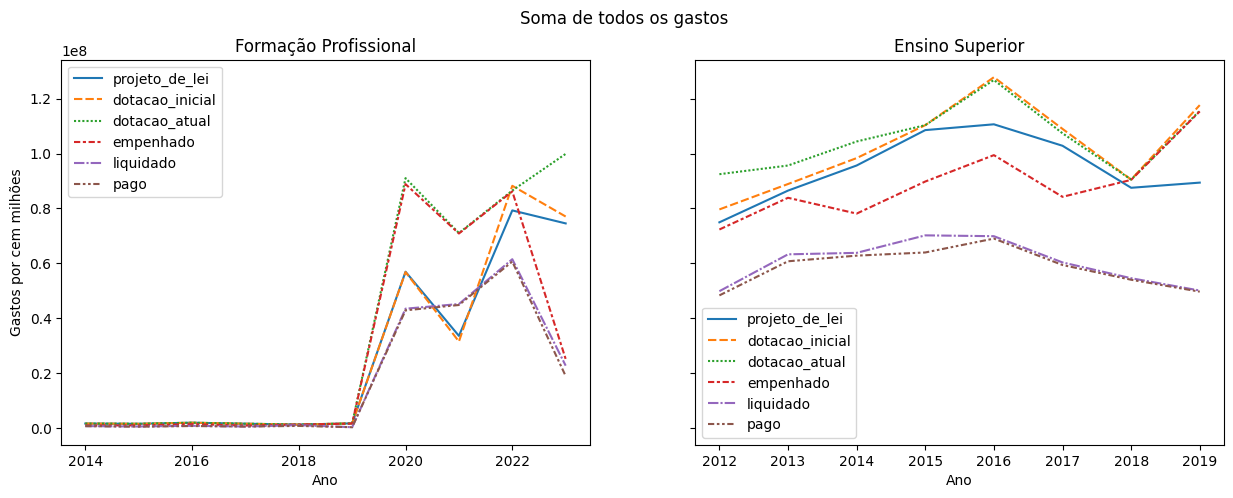

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Soma de todos os gastos')

sns.lineplot(ax=axes[0], data=objetivo_formacao_profissional[colunas_alvo_soma])
axes[0].set_title('Formação Profissional')

sns.lineplot(ax=axes[1], data=objetivo_ensino_superior[colunas_alvo_soma])
axes[1].set_title('Ensino Superior')

definindo_labels(1, 2, axes, 'Ano', 'Gastos por cem milhões')

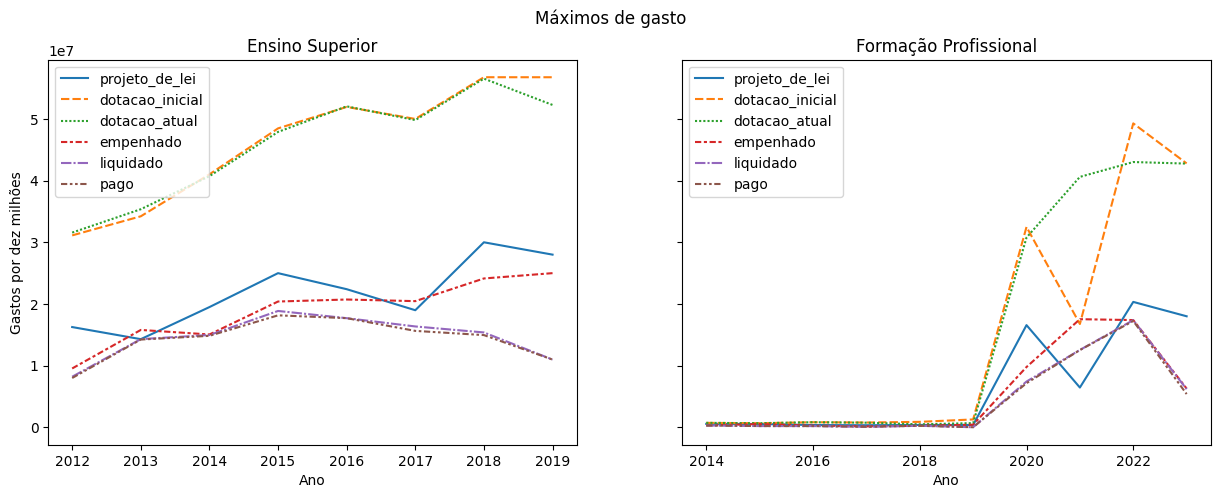

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Máximos de gasto')

sns.lineplot(ax=axes[0], data=objetivo_ensino_superior[colunas_alvo_maximo])
axes[0].set_title('Ensino Superior')

sns.lineplot(ax=axes[1], data=objetivo_formacao_profissional[colunas_alvo_maximo])
axes[1].set_title('Formação Profissional')

definindo_labels(1, 2, axes, 'Ano', 'Gastos por dez milhões')

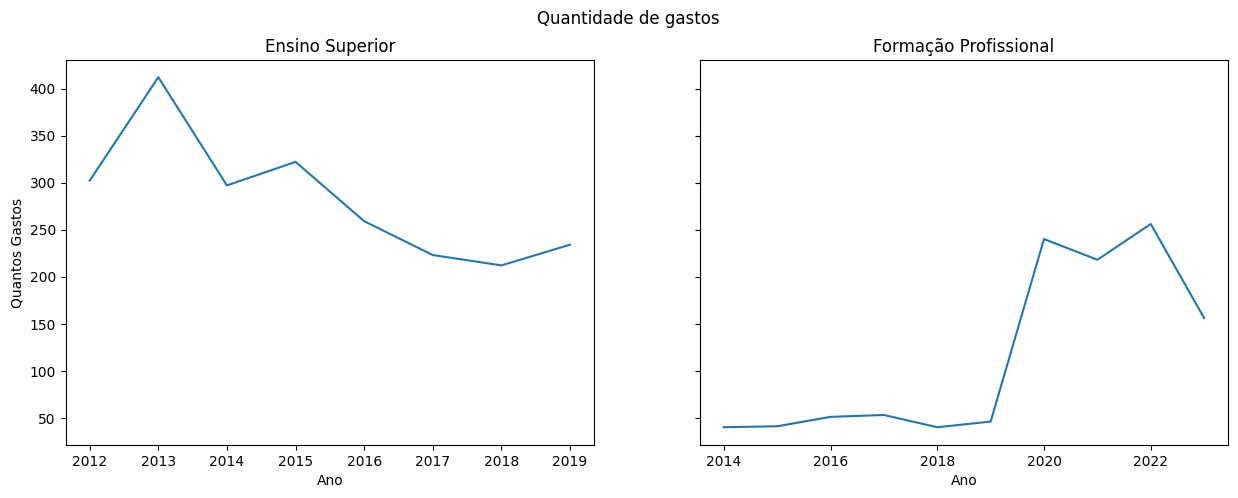

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Quantidade de gastos')

sns.lineplot(ax=axes[0], data=objetivo_ensino_superior[colunas_alvo_quantidade])
axes[0].set_title('Ensino Superior')

sns.lineplot(ax=axes[1], data=objetivo_formacao_profissional[colunas_alvo_quantidade])
axes[1].set_title('Formação Profissional')

definindo_labels(1, 2, axes, 'Ano', 'Quantos Gastos')

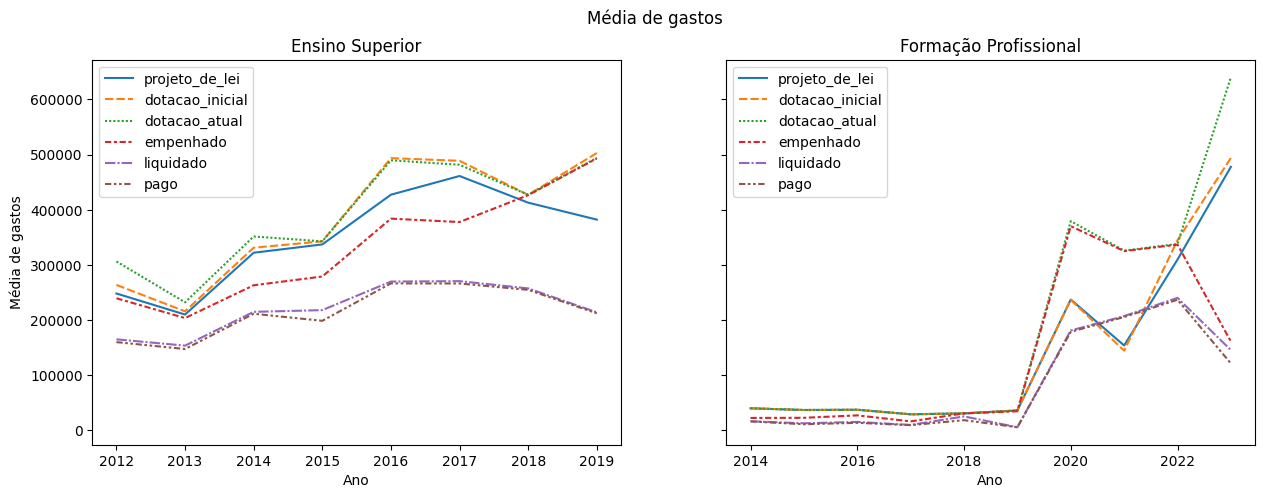

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Média de gastos')

sns.lineplot(ax=axes[0], data=objetivo_ensino_superior[colunas_alvo_media])
axes[0].set_title('Ensino Superior')

sns.lineplot(ax=axes[1], data=objetivo_formacao_profissional[colunas_alvo_media])
axes[1].set_title('Formação Profissional')

definindo_labels(1, 2, axes, 'Ano', 'Média de gastos')

## Análise específica de objetivos

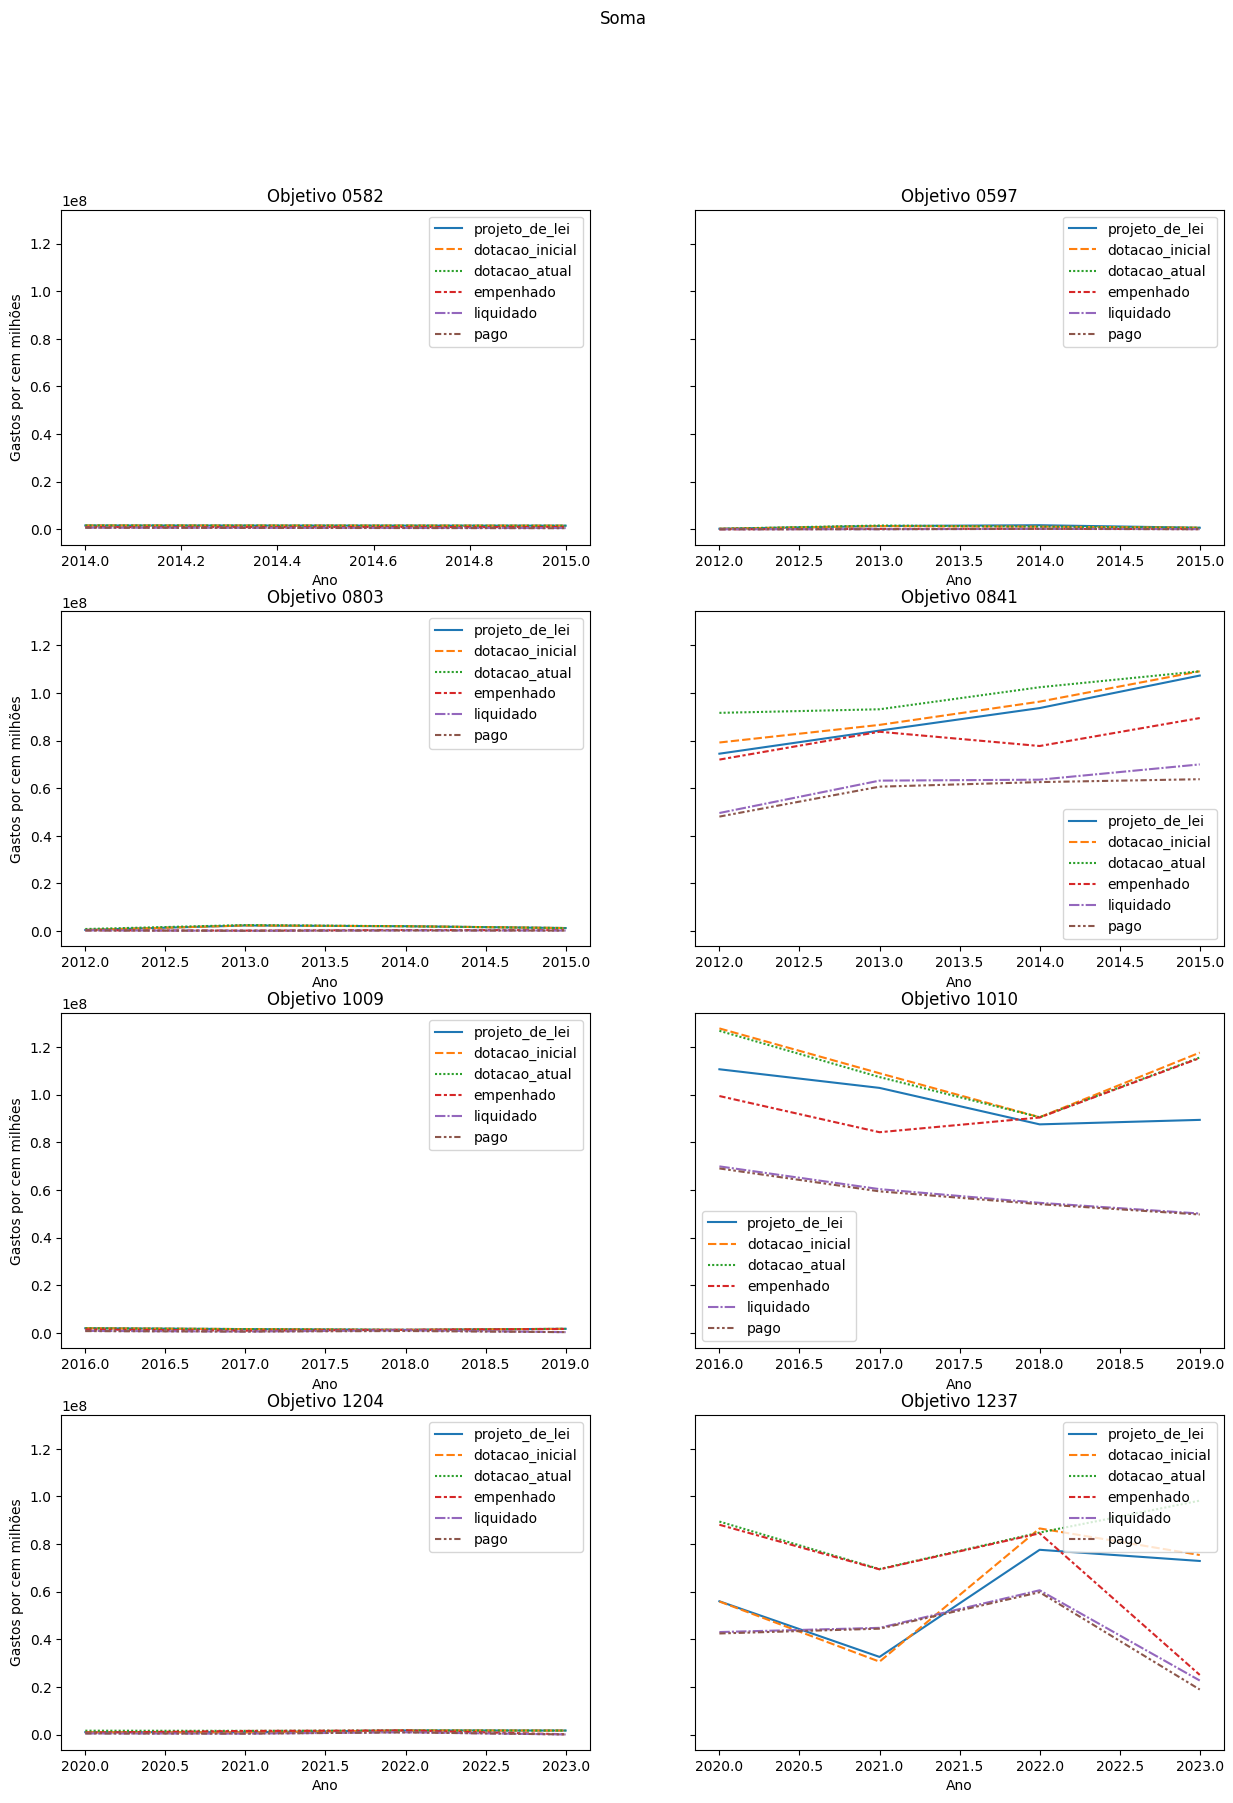

In [102]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle('Soma')

sns.lineplot(ax=axes[0,0], data=objetivo_0582[colunas_alvo_soma])
axes[0,0].set_title('Objetivo 0582')

sns.lineplot(ax=axes[0,1], data=objetivo_0597[colunas_alvo_soma])
axes[0,1].set_title('Objetivo 0597')

sns.lineplot(ax=axes[1, 0], data=objetivo_0803[colunas_alvo_soma])
axes[1, 0].set_title('Objetivo 0803')

sns.lineplot(ax=axes[1, 1], data=objetivo_0841[colunas_alvo_soma])
axes[1, 1].set_title('Objetivo 0841')

sns.lineplot(ax=axes[2,0], data=objetivo_1009[colunas_alvo_soma])
axes[2,0].set_title('Objetivo 1009')

sns.lineplot(ax=axes[2,1], data=objetivo_1010[colunas_alvo_soma])
axes[2,1].set_title('Objetivo 1010')

sns.lineplot(ax=axes[3,0], data=objetivo_1204[colunas_alvo_soma])
axes[3,0].set_title('Objetivo 1204')

sns.lineplot(ax=axes[3,1], data=objetivo_1237[colunas_alvo_soma])
axes[3,1].set_title('Objetivo 1237')

definindo_labels(4, 2, axes, 'Ano', 'Gastos por cem milhões')

* Objetivos que tiveram mais impacto foram o 0841, 1010 e 1237, como foram os mais importantes, vale lembrar os detalhes e busca de cada um:

    1. 0841:
        * Objetivo em ampliar o acesso à educação superior, tanto na concessão de bolsas de estudos em instituições privadas para alunos de baixa renda, tanto no financiamento estudantil, promovendo o apoio às instituições de educação superior.
    
    2. 1010:
        * Ampliar o acesso à educação superior de qualidade, na graduação e na pós graduação;
        * Apoio à residência em saúde;
        * Concessão de Bolsas de estudos no Ensino Superior;
        * Funcionamento das intituições;

    3. 1237:
        * Formentar a formação de pessoal qualificado, fortalecendo a assistência estudantil, e a inovação de forma conectada às demandas do setor produtivo e às necessidades da sociedade em um mundo globalizado.

Text(0.5, 1.0, 'Gastos de objetivos não detalhados')

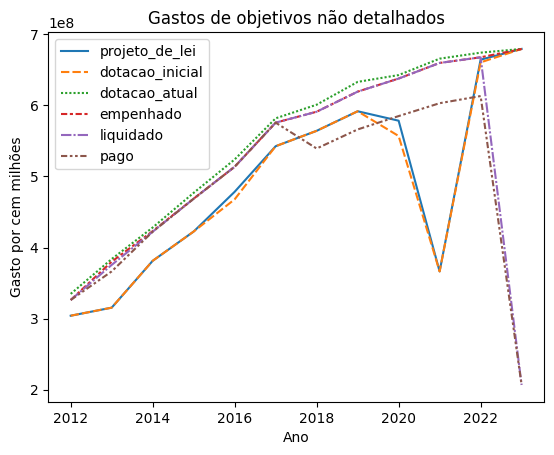

In [103]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_soma])
plt.xlabel('Ano')
plt.ylabel('Gasto por cem milhões')
plt.title('Gastos de objetivos não detalhados')

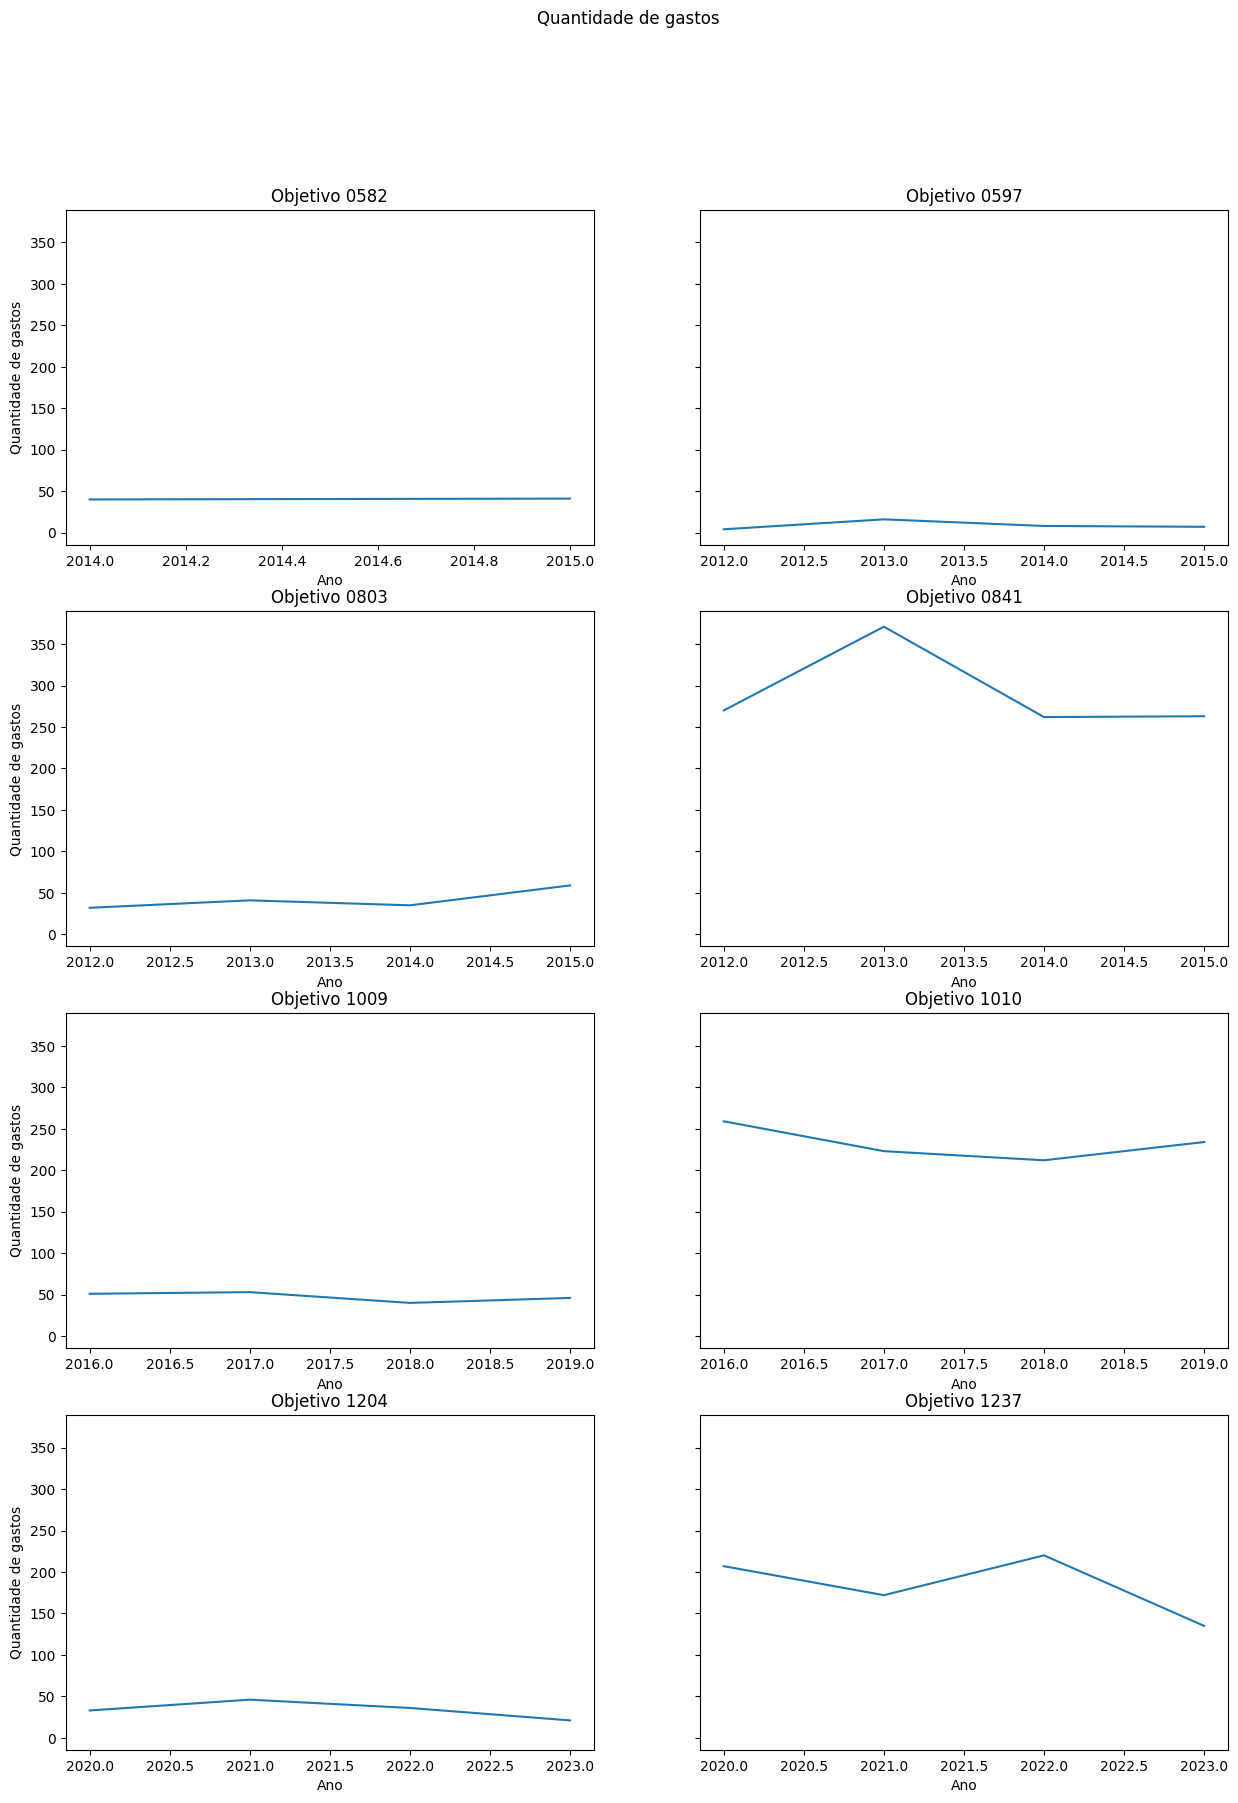

In [104]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle('Quantidade de gastos')

sns.lineplot(ax=axes[0,0], data=objetivo_0582[colunas_alvo_quantidade])
axes[0,0].set_title('Objetivo 0582')

sns.lineplot(ax=axes[0,1], data=objetivo_0597[colunas_alvo_quantidade])
axes[0,1].set_title('Objetivo 0597')

sns.lineplot(ax=axes[1, 0], data=objetivo_0803[colunas_alvo_quantidade])
axes[1, 0].set_title('Objetivo 0803')

sns.lineplot(ax=axes[1, 1], data=objetivo_0841[colunas_alvo_quantidade])
axes[1, 1].set_title('Objetivo 0841')

sns.lineplot(ax=axes[2,0], data=objetivo_1009[colunas_alvo_quantidade])
axes[2,0].set_title('Objetivo 1009')

sns.lineplot(ax=axes[2,1], data=objetivo_1010[colunas_alvo_quantidade])
axes[2,1].set_title('Objetivo 1010')

sns.lineplot(ax=axes[3,0], data=objetivo_1204[colunas_alvo_quantidade])
axes[3,0].set_title('Objetivo 1204')

sns.lineplot(ax=axes[3,1], data=objetivo_1237[colunas_alvo_quantidade])
axes[3,1].set_title('Objetivo 1237')

definindo_labels(4, 2, axes, 'Ano', 'Quantidade de gastos')

Text(0.5, 1.0, 'Gastos de objetivos não detalhados')

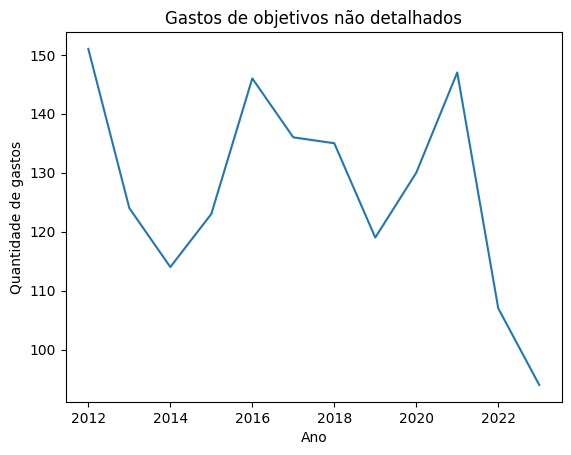

In [105]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_quantidade])
plt.xlabel('Ano')
plt.ylabel('Quantidade de gastos')
plt.title('Gastos de objetivos não detalhados')

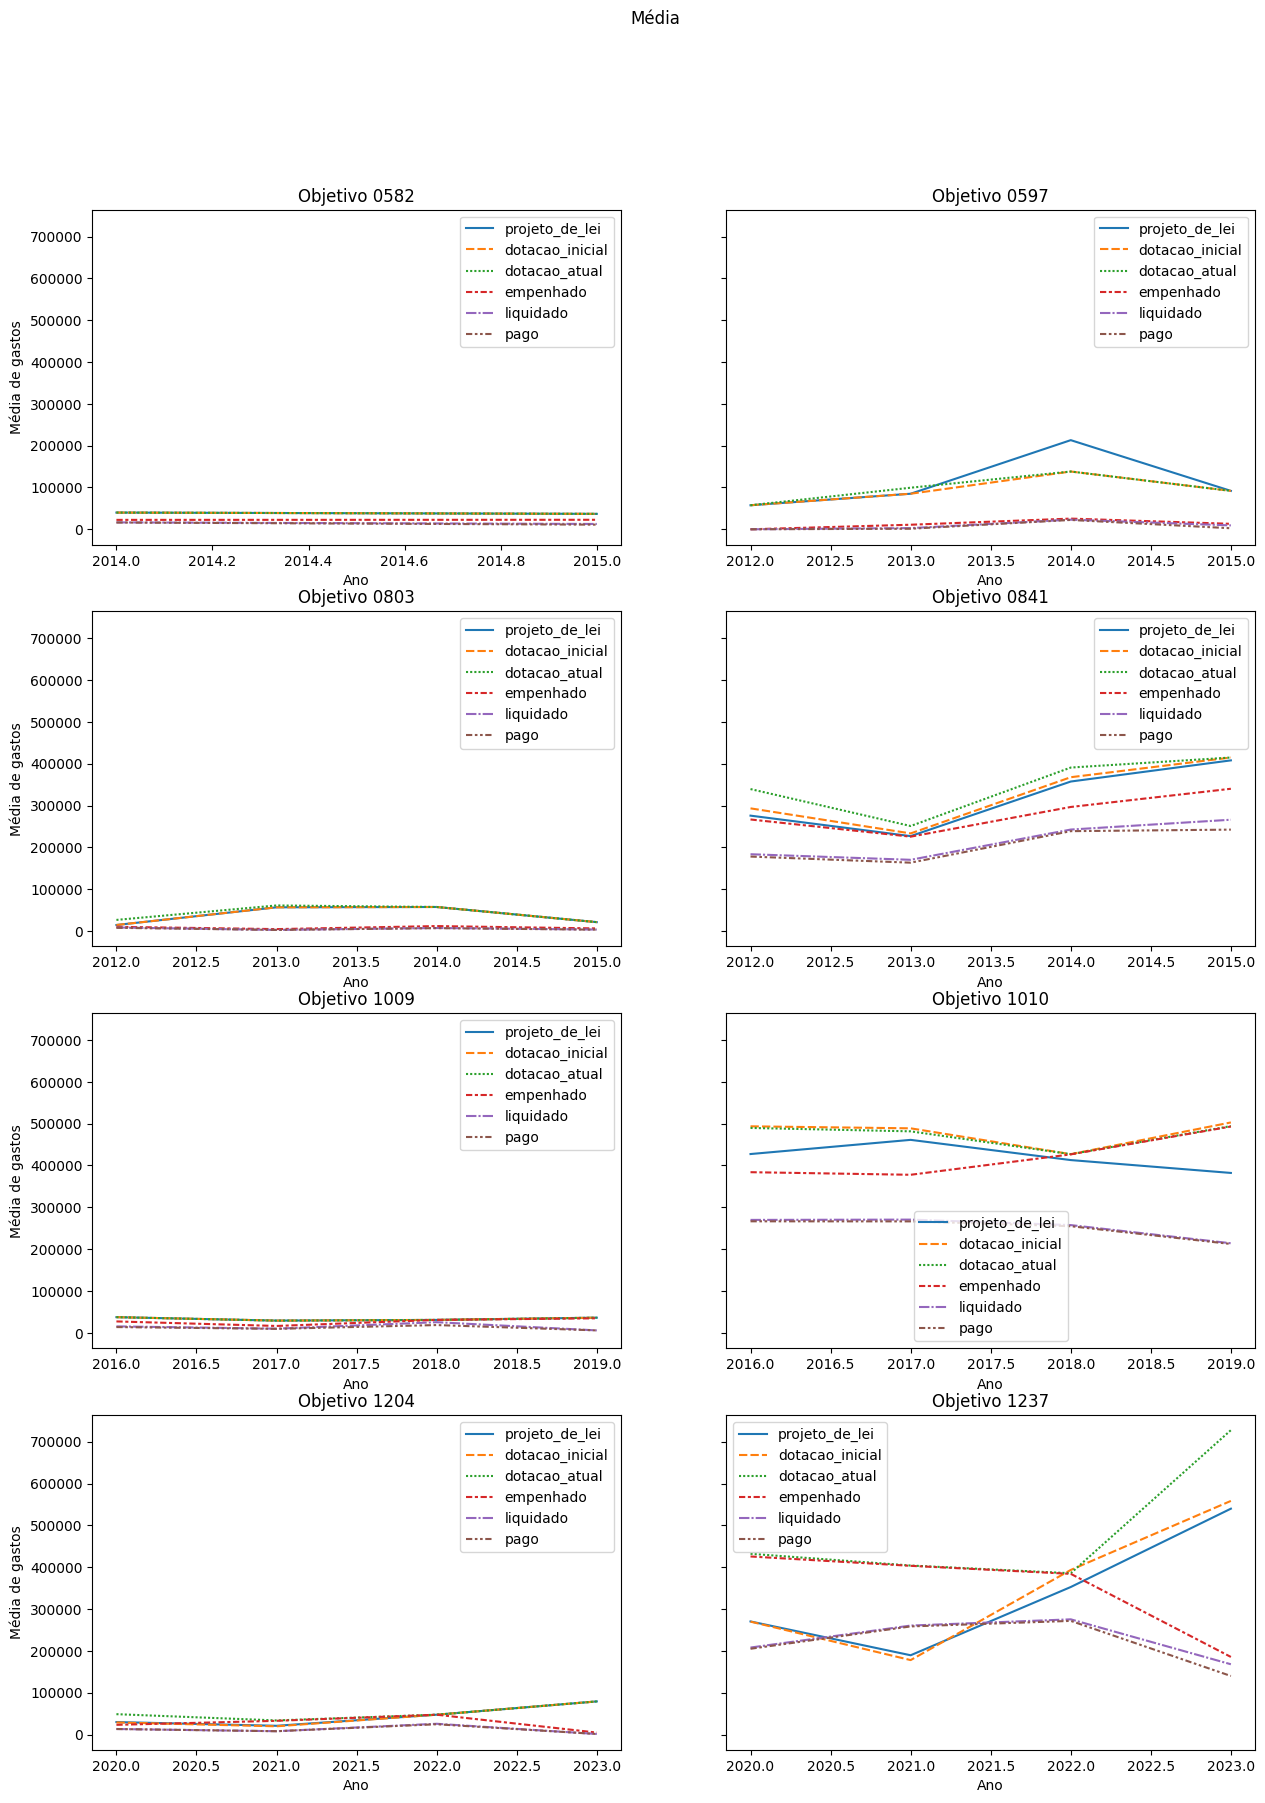

In [106]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle('Média')

sns.lineplot(ax=axes[0,0], data=objetivo_0582[colunas_alvo_media])
axes[0,0].set_title('Objetivo 0582')

sns.lineplot(ax=axes[0,1], data=objetivo_0597[colunas_alvo_media])
axes[0,1].set_title('Objetivo 0597')

sns.lineplot(ax=axes[1, 0], data=objetivo_0803[colunas_alvo_media])
axes[1, 0].set_title('Objetivo 0803')

sns.lineplot(ax=axes[1, 1], data=objetivo_0841[colunas_alvo_media])
axes[1, 1].set_title('Objetivo 0841')

sns.lineplot(ax=axes[2,0], data=objetivo_1009[colunas_alvo_media])
axes[2,0].set_title('Objetivo 1009')

sns.lineplot(ax=axes[2,1], data=objetivo_1010[colunas_alvo_media])
axes[2,1].set_title('Objetivo 1010')

sns.lineplot(ax=axes[3,0], data=objetivo_1204[colunas_alvo_media])
axes[3,0].set_title('Objetivo 1204')

sns.lineplot(ax=axes[3,1], data=objetivo_1237[colunas_alvo_media])
axes[3,1].set_title('Objetivo 1237')

definindo_labels(4, 2, axes, 'Ano', 'Média de gastos')

Text(0.5, 1.0, 'Gastos de objetivos não detalhados')

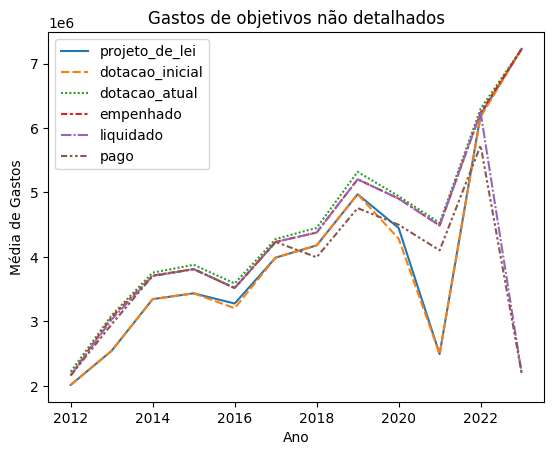

In [107]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_media])
plt.xlabel('Ano')
plt.ylabel('Média de Gastos')
plt.title('Gastos de objetivos não detalhados')

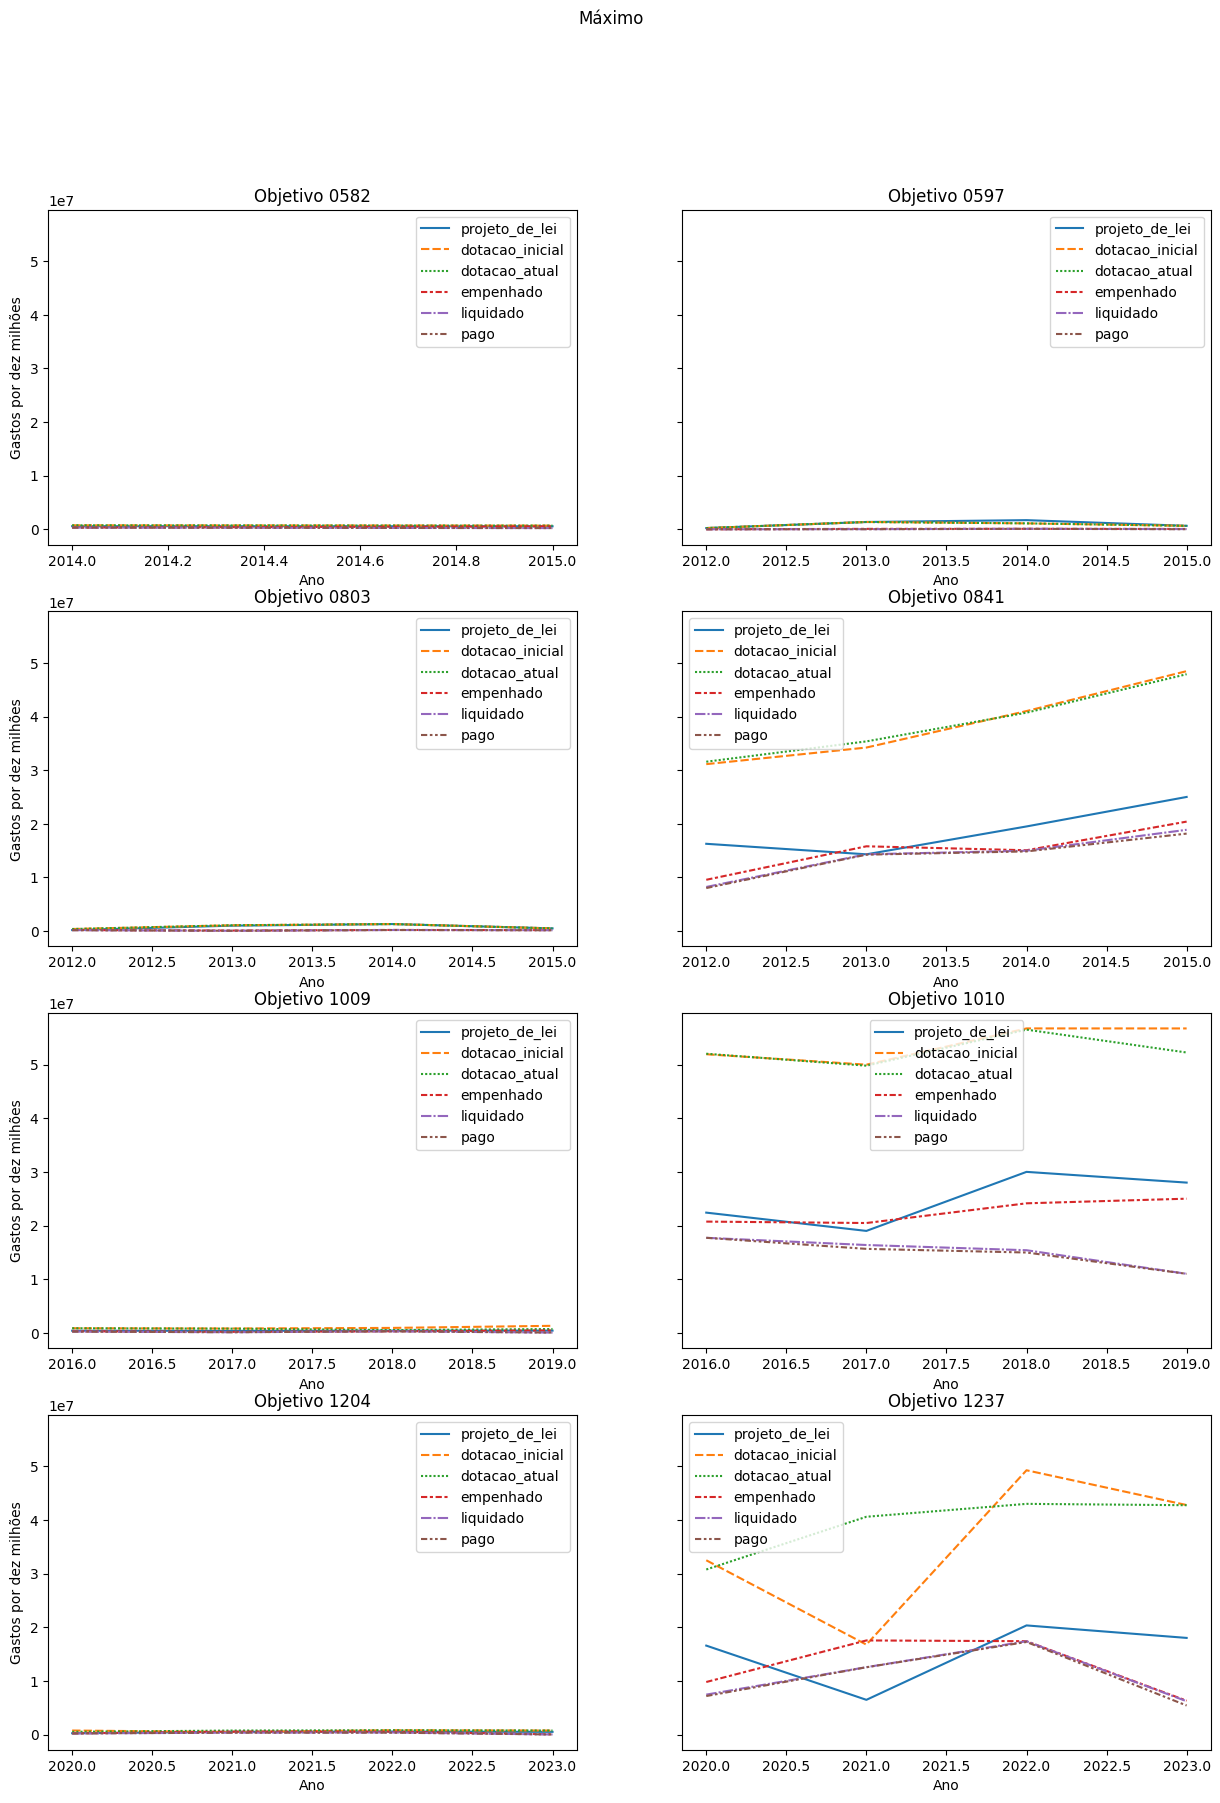

In [108]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle('Máximo')

sns.lineplot(ax=axes[0,0], data=objetivo_0582[colunas_alvo_maximo])
axes[0,0].set_title('Objetivo 0582')

sns.lineplot(ax=axes[0,1], data=objetivo_0597[colunas_alvo_maximo])
axes[0,1].set_title('Objetivo 0597')

sns.lineplot(ax=axes[1, 0], data=objetivo_0803[colunas_alvo_maximo])
axes[1, 0].set_title('Objetivo 0803')

sns.lineplot(ax=axes[1, 1], data=objetivo_0841[colunas_alvo_maximo])
axes[1, 1].set_title('Objetivo 0841')

sns.lineplot(ax=axes[2,0], data=objetivo_1009[colunas_alvo_maximo])
axes[2,0].set_title('Objetivo 1009')

sns.lineplot(ax=axes[2,1], data=objetivo_1010[colunas_alvo_maximo])
axes[2,1].set_title('Objetivo 1010')

sns.lineplot(ax=axes[3,0], data=objetivo_1204[colunas_alvo_maximo])
axes[3,0].set_title('Objetivo 1204')

sns.lineplot(ax=axes[3,1], data=objetivo_1237[colunas_alvo_maximo])
axes[3,1].set_title('Objetivo 1237')

definindo_labels(4, 2, axes, 'Ano', 'Gastos por dez milhões')

Text(0.5, 1.0, 'Gastos de objetivos não detalhados')

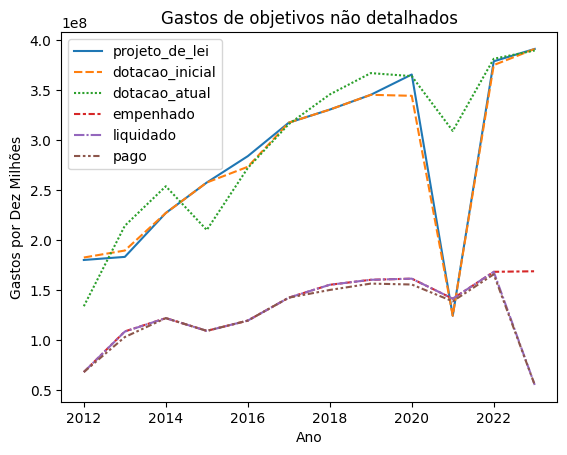

In [109]:
sns.lineplot(objetivo_nao_detalhado[colunas_alvo_maximo])
plt.xlabel('Ano')
plt.ylabel('Gastos por Dez Milhões')
plt.title('Gastos de objetivos não detalhados')

## Gráficos para apresentação


In [110]:
objetivos_maiores_ensino_superior = pd.concat([
  objetivo_0841.reset_index(), 
  objetivo_1010.reset_index()  
], axis = 0).groupby('ano').sum()

objetivos_formacao_profissional_sem_maior = pd.concat([
    objetivo_0582.reset_index(), 
    objetivo_1009.reset_index(), 
    objetivo_1204.reset_index()
], axis = 0).groupby('ano').sum()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\476201628.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ], axis = 0).groupby('ano').sum()
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_38820\476201628.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ], axis = 0).groupby('ano').sum()


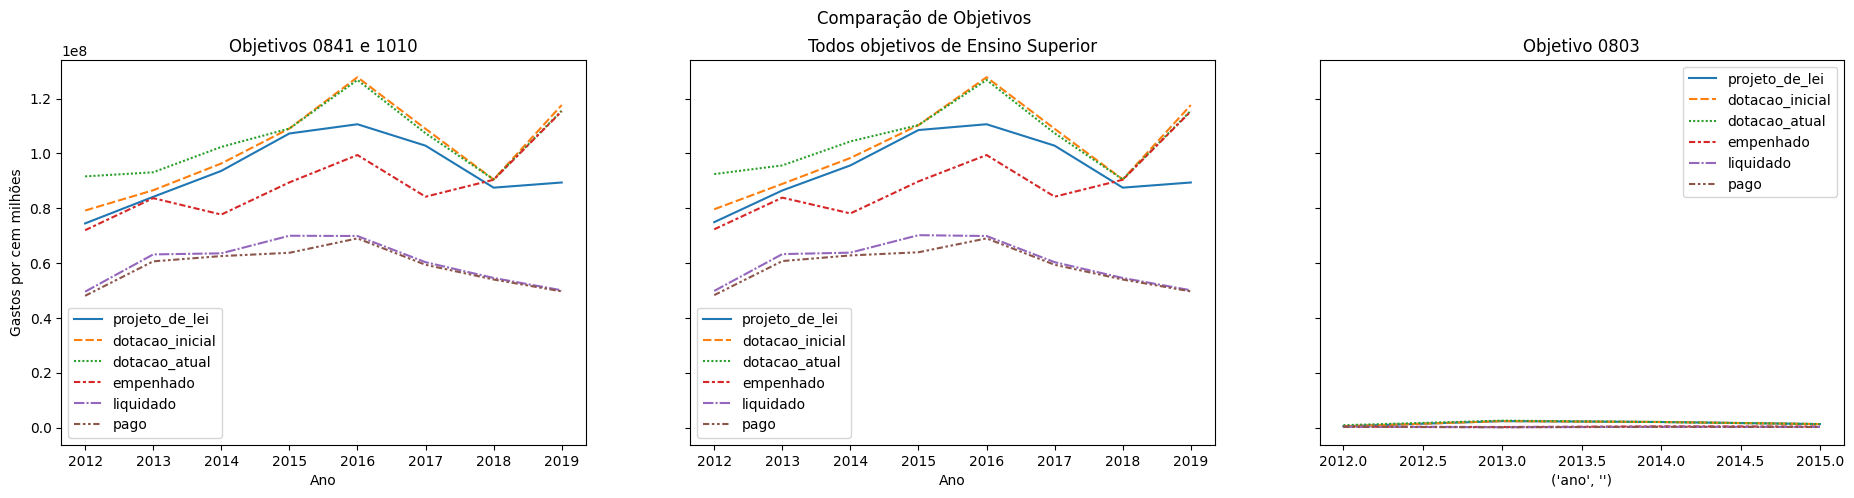

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
fig.suptitle('Comparação de Objetivos')

sns.lineplot(ax=axes[0], data=objetivos_maiores_ensino_superior[colunas_alvo_soma])
axes[0].set_title('Objetivos 0841 e 1010')

sns.lineplot(ax=axes[1], data=objetivo_ensino_superior[colunas_alvo_soma])
axes[1].set_title('Todos objetivos de Ensino Superior')

sns.lineplot(ax=axes[2], data=objetivo_0803[colunas_alvo_soma])
axes[2].set_title('Objetivo 0803')

definindo_labels(1, 2, axes, 'Ano', 'Gastos por cem milhões')

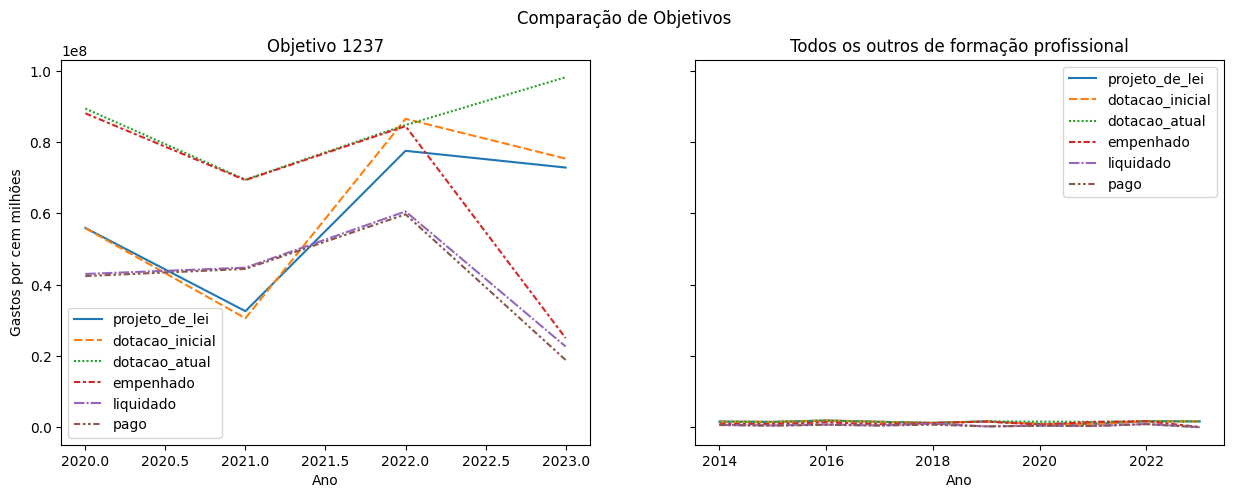

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Comparação de Objetivos')

sns.lineplot(ax=axes[0], data=objetivo_1237[colunas_alvo_soma])
axes[0].set_title('Objetivo 1237')

sns.lineplot(ax=axes[1], data=objetivos_formacao_profissional_sem_maior[colunas_alvo_soma])
axes[1].set_title('Todos os outros de formação profissional')

definindo_labels(1, 2, axes, 'Ano', 'Gastos por cem milhões')

## Conclusões

1. O que é um Objetivo:
    * Objetivo como gasto Federal na rede de Educação é uma especificidade do Programa do investimento, ou seja, um Programa pode ter mais de um Objetivo.
    * Cada Objetivo tem um código que a identifica, uma descrição que a define e uma série de metas que garantem o entendimento do gasto.
    * Além destas informações, cada Objetivo tem ações que especificam mais ainda os gastos a serem realizados, tais ações tendo descrições e metas correspondentes.

2. Diferenças entre gastos de Ensino Superior X Formação Profissional:
    * Os gastos do Ensino superior são mais estáveis, além de que 2 dos 3 objetivos presentes na Consulta SIOP tem extrema influência nos gastos em seu respectivo ano de atuação.
    * Entretanto, a Formação Profissional na Consulta SIOP identifica uma irregularidade, pois apenas um objetivo tem total influência nos gastos em relação aos outros três objetivos que quase não teve influência.
    * Vale lembrar que os Gastos de Objetivos declarados tiveram entre 20 e 50 gastos ao ano como mínima quantidade por objetivo.

3. Valores não detalhados:
    * Como a coluna de Objetivo é "Macro" para "Ações" e "Micro" para "Programa", os valores não detalhados não apresentam padrão ou estabilidade nos gráficos, sendo impossível entender seu comportamento apenas olhando para a coluna de objetivos, ou seja, para esta análise esses valores serão ignorados.

4. Objetivos de Destaque:
    * Objetivo 1237
        * Descrição: “Fomentar a formação de pessoal qualificado, fortalecendo a…”
        * As possíveis causas desse alto investimento:
            * Altos custos de integração do curso de Ensino Superior com o mercado de trabalho e profissionalização. 
            * Busca por profissionalizar mão de obra pela Universidade.
            * Redução de gastos na parte de Educação e foco na Profissionalização.
    * Objetivo 0841
        * Descrição: “Ampliar o acesso à educação superior com condições de...”
        * As possíveis causas desse alto investimento: 
            * A expansão da Rede Federal de Ensino 
            * Elevação da Qualidade acadêmica e dos recursos humanos das universidades e redes públicas de ensino superior.

    * Objetivo 1010
        * Descrição: “Ampliar o acesso à educação superior com condições de...”
        * As possíveis causas desse alto investimento: 
            * Procurou buscar aumentar a quantidade de universitários matriculados e garantir a não evasão, na assistência ao estudante do Ensino Superior. 

